#Import Libraries

In [ ]:
!pip install sdv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 102 kB 2.7 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 131 kB 31.9 MB/s 
     |████████████████████████████████| 61 kB 371 kB/s 
     |████████████████████████████████| 1.6 MB 52.0 MB/s 
     |████████████████████████████████| 47 kB 4.6 MB/s 
     |████████████████████████████████| 11.2 MB 44.4 MB/s 
     |████████████████████████████████| 960 kB 54.8 MB/s 
     |████████████████████████████████| 636 kB 51.5 MB/s 
     |████████████████████████████████| 291 kB 57.5 MB/s 
     |████████████████████████████████| 15.2 MB 37.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successf

In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.metrics import precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import Dataset

In [ ]:
import pandas as pd

path = "/content/drive/MyDrive/Colab Notebooks/data/Responses_data.csv"
data = pd.read_csv(path)

# Dataset is now stored in a Pandas Dataframe

In [ ]:
data

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Qchat-10-Score,Age_Mons,Sex,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,1,1,1,1,1,1,1,0,1,1,9,48.0,1,0,0,4,1
1,2,1,1,0,0,1,1,1,0,1,1,7,36.0,1,0,0,4,1
2,3,1,0,0,1,1,0,1,1,1,0,6,36.0,1,0,0,2,1
3,4,1,1,0,1,1,1,1,1,1,0,8,42.0,1,0,0,2,1
4,5,1,0,0,0,1,1,1,0,0,1,5,21.6,0,0,0,2,1
5,6,1,0,0,0,1,0,1,0,0,1,4,36.0,1,0,0,2,1
6,7,0,0,0,0,0,0,0,0,0,1,1,30.0,0,0,0,2,0
7,8,0,0,0,0,0,0,1,0,0,1,2,42.0,0,0,0,4,0
8,9,1,1,1,0,0,1,0,1,0,1,6,36.0,1,1,1,3,1
9,10,0,0,1,1,0,0,1,1,0,1,5,34.8,1,0,1,4,1


#Drop columns

In [ ]:
#drop columns

data = data.drop(columns=['Qchat-10-Score','Who completed the test'])

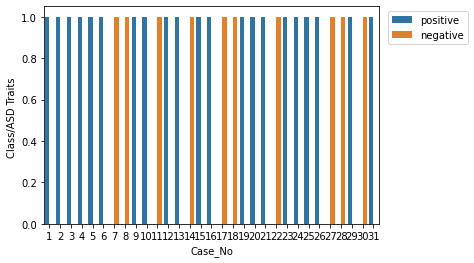

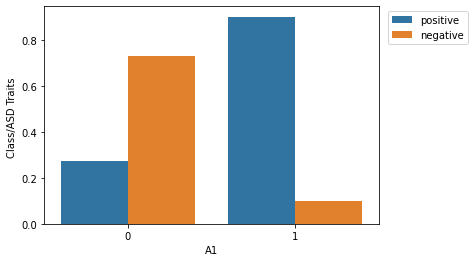

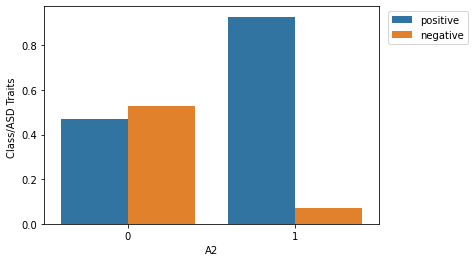

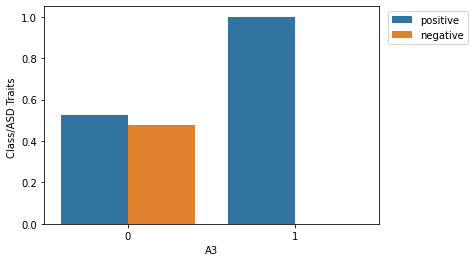

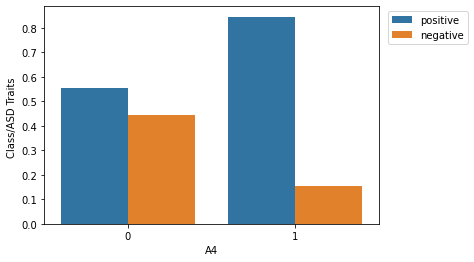

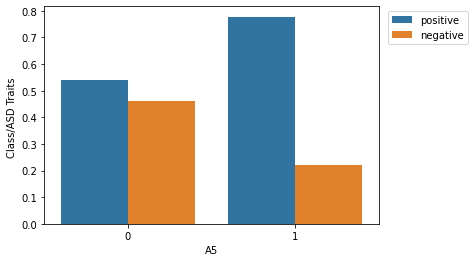

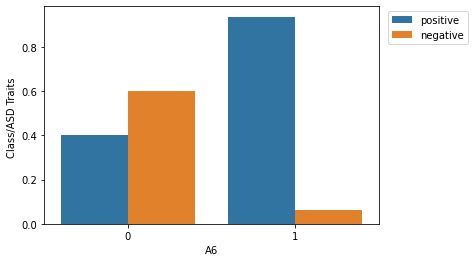

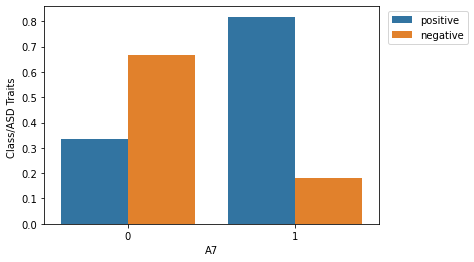

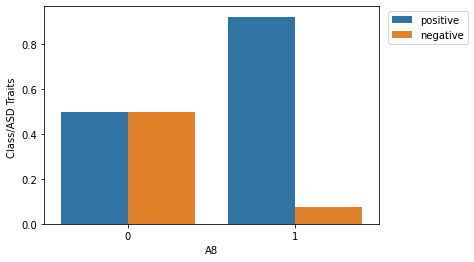

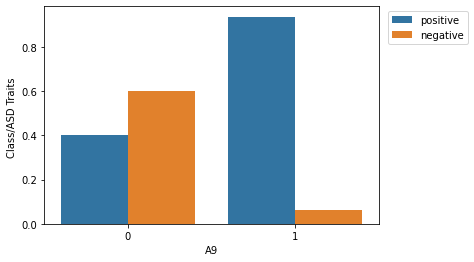

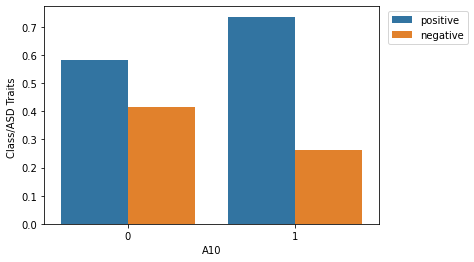

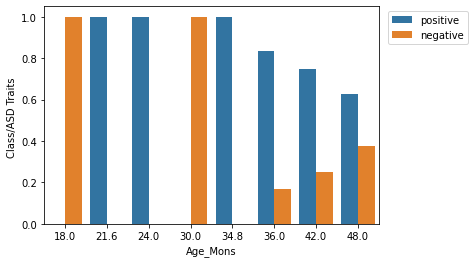

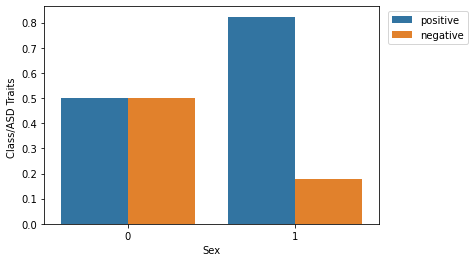

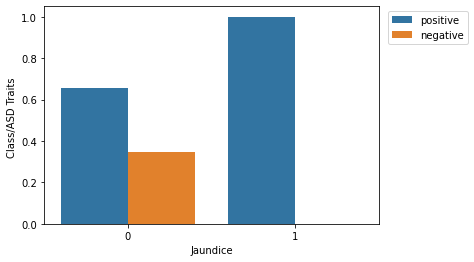

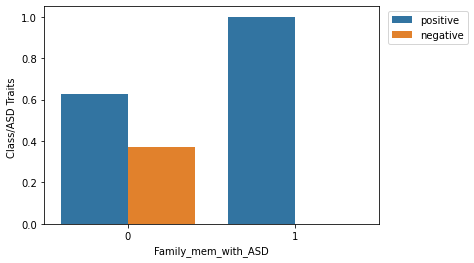

In [ ]:
bin_data=pd.DataFrame.copy(data)

for column_name in data.columns:
    if(column_name == 'Class/ASD Traits '):
        continue;
    group_by_modelLine = bin_data[[column_name,'Class/ASD Traits ']].groupby(by=[column_name])
# --------------------- get mean to draw histogram ---------------------
    mean=group_by_modelLine.mean().reset_index()
    mean.columns=[column_name,'positive']
    mean['negative']=mean['positive'].apply(lambda x: 1-x)
    mean=pd.melt(mean, id_vars=column_name, var_name="Pos/Neg", value_name="Class/ASD Traits ")
    p=sns.barplot(x=column_name, y='Class/ASD Traits ', hue='Pos/Neg', data=mean.reset_index())
    p.legend(loc='best', bbox_to_anchor=(1.28, 1), ncol=1)
    plt.show()


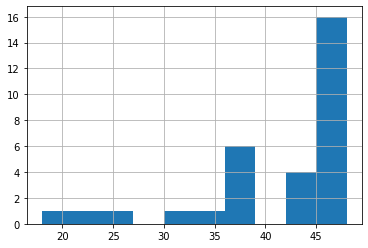

In [ ]:
data.Age_Mons.hist();

#CouplaGAN

In [ ]:
from sdv.tabular import CopulaGAN

model = CopulaGAN()
model.fit(data)

/usr/local/lib/python3.7/dist-packages/ctgan/data_transformer.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].to_numpy().flatten()
/usr/local/lib/python3.7/dist-packages/ctgan/data_transformer.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].to_numpy().flatten()
/usr/local/lib/python3.7/dist-packages/ctgan/data_transformer.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


#Generate 250 rows

In [ ]:
new_data = model.sample(num_rows=250)

In [ ]:
new_data.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,1,1,0,1,0,1,0,1,1,0,1,19.3,1,0,0,1
1,15,1,1,0,0,0,0,1,0,0,1,34.3,1,0,0,1
2,29,1,0,1,0,1,0,1,0,0,0,18.2,1,0,0,1
3,13,1,0,0,1,1,1,1,0,0,1,48.0,1,0,0,0
4,24,1,0,0,1,0,0,1,1,0,1,45.7,1,0,0,1


In [ ]:
model.save('Noise_sdv_CopulaGAN.csv')

In [ ]:
loaded = CopulaGAN.load('Noise_sdv_CopulaGAN.csv')
new_data = loaded.sample(num_rows=250)

#Specifying the Primary Key of the table

In [ ]:
data.Case_No.value_counts().max()

1

In [ ]:
new_data[new_data.Case_No == new_data.Case_No.value_counts().index[0]]

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Jaundice,Family_mem_with_ASD,Class/ASD Traits
5,31,0,0,0,1,0,0,1,1,1,1,30.8,1,0,0,0
9,31,1,1,1,1,1,1,1,0,0,1,18.0,0,0,0,1
25,31,1,0,0,0,1,0,1,0,1,1,18.0,1,0,0,1
27,31,1,1,0,0,1,1,1,0,0,0,48.0,1,0,1,1
32,31,1,1,0,1,0,0,1,1,0,0,24.9,1,0,0,1
38,31,0,0,0,0,0,0,1,0,1,1,18.8,0,0,0,0
46,31,1,1,1,0,1,0,1,0,0,1,48.0,0,1,0,1
53,31,1,0,0,1,1,1,0,1,1,1,48.0,1,0,0,0
59,31,1,1,0,0,0,0,1,0,0,1,46.6,1,0,0,0
74,31,0,1,0,0,0,1,0,0,1,1,18.0,1,0,0,0


In [ ]:
model = CopulaGAN(
    primary_key='Case_No'
)
model.fit(data)
new_data = model.sample(250)
new_data.head()

/usr/local/lib/python3.7/dist-packages/ctgan/data_transformer.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].to_numpy().flatten()
/usr/local/lib/python3.7/dist-packages/ctgan/data_transformer.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].to_numpy().flatten()
/usr/local/lib/python3.7/dist-packages/ctgan/data_transformer.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,0,1,1,0,1,0,0,1,1,0,1,48.0,1,0,0,1
1,1,1,0,0,0,0,1,1,1,0,1,48.0,1,0,0,1
2,2,0,0,0,1,1,0,1,0,1,1,47.9,1,0,0,1
3,3,1,0,0,0,1,0,1,1,0,1,48.0,1,0,0,1
4,4,1,1,0,0,1,0,1,0,1,0,45.7,0,0,0,1


###Distribution of data

array([[<AxesSubplot:title={'center':'Case_No'}>,
        <AxesSubplot:title={'center':'A1'}>,
        <AxesSubplot:title={'center':'A2'}>,
        <AxesSubplot:title={'center':'A3'}>],
       [<AxesSubplot:title={'center':'A4'}>,
        <AxesSubplot:title={'center':'A5'}>,
        <AxesSubplot:title={'center':'A6'}>,
        <AxesSubplot:title={'center':'A7'}>],
       [<AxesSubplot:title={'center':'A8'}>,
        <AxesSubplot:title={'center':'A9'}>,
        <AxesSubplot:title={'center':'A10'}>,
        <AxesSubplot:title={'center':'Age_Mons'}>],
       [<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Jaundice'}>,
        <AxesSubplot:title={'center':'Family_mem_with_ASD'}>,
        <AxesSubplot:title={'center':'Class/ASD Traits '}>]], dtype=object)

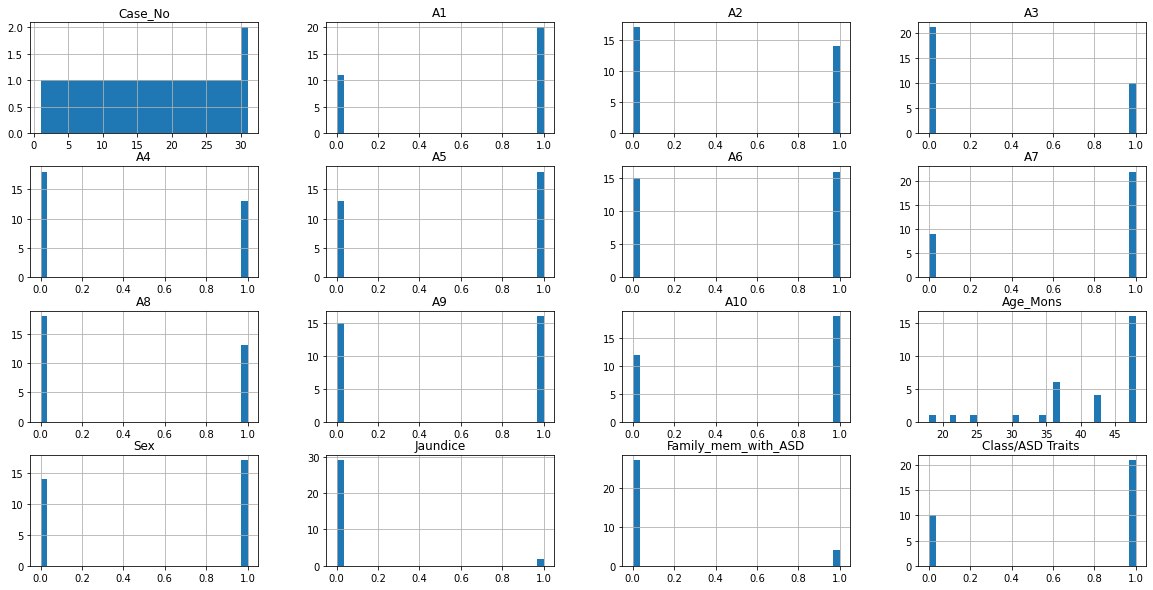

In [ ]:
data.hist(bins=30, figsize=(20, 10))

array([[<AxesSubplot:title={'center':'Case_No'}>,
        <AxesSubplot:title={'center':'A1'}>,
        <AxesSubplot:title={'center':'A2'}>,
        <AxesSubplot:title={'center':'A3'}>],
       [<AxesSubplot:title={'center':'A4'}>,
        <AxesSubplot:title={'center':'A5'}>,
        <AxesSubplot:title={'center':'A6'}>,
        <AxesSubplot:title={'center':'A7'}>],
       [<AxesSubplot:title={'center':'A8'}>,
        <AxesSubplot:title={'center':'A9'}>,
        <AxesSubplot:title={'center':'A10'}>,
        <AxesSubplot:title={'center':'Age_Mons'}>],
       [<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Jaundice'}>,
        <AxesSubplot:title={'center':'Family_mem_with_ASD'}>,
        <AxesSubplot:title={'center':'Class/ASD Traits '}>]], dtype=object)

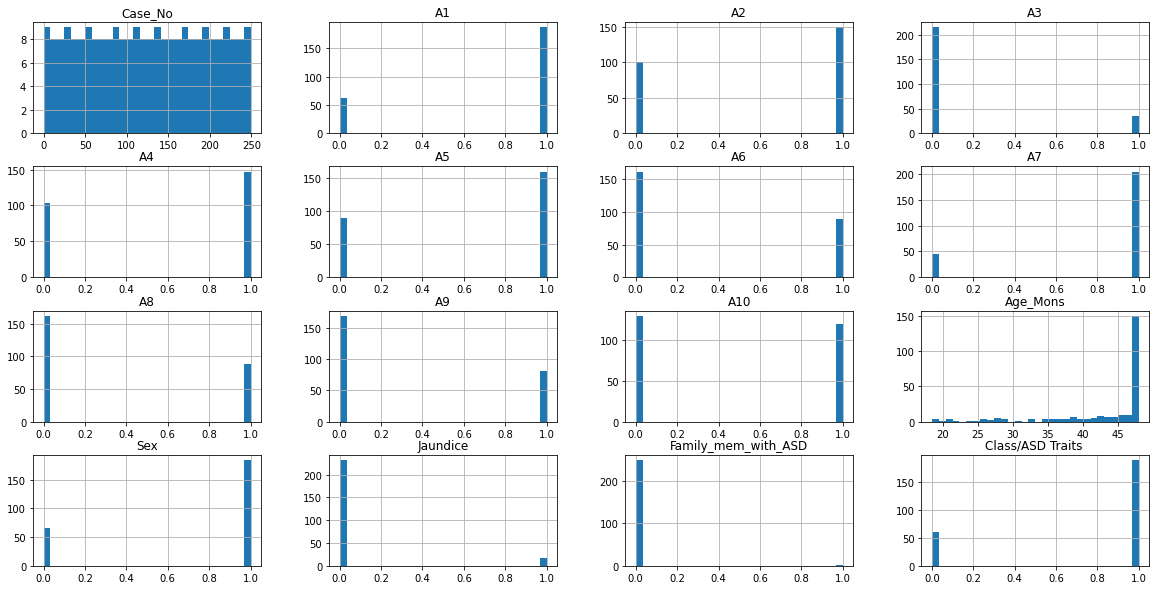

In [ ]:
new_data.hist(bins=30, figsize=(20, 10))

###Download new_data

In [ ]:
from google.colab import files

new_data.to_csv('new_data.csv')
files.download('new_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###distributions for indvidual (gamma)

In [ ]:
model = CopulaGAN(
     primary_key='Case_No',
     field_distributions={
         'Class/ASD Traits ': 'gamma'
     },
     enforce_min_max_values=False
)

model.fit(data)


/usr/local/lib/python3.7/dist-packages/ctgan/data_transformer.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].to_numpy().flatten()
/usr/local/lib/python3.7/dist-packages/ctgan/data_transformer.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].to_numpy().flatten()
/usr/local/lib/python3.7/dist-packages/ctgan/data_transformer.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [ ]:
model.get_distributions()['Class/ASD Traits .value']
'copulas.univariate.gamma.GammaUnivariate'

'copulas.univariate.gamma.GammaUnivariate'

In [ ]:
new_data = model.sample(len(data))

In [ ]:
new_data.Age_Mons.value_counts()

48.0    13
47.9     2
35.8     1
25.2     1
38.6     1
46.3     1
37.6     1
42.4     1
18.7     1
43.8     1
22.8     1
30.2     1
36.2     1
38.1     1
37.9     1
47.5     1
31.7     1
45.1     1
Name: Age_Mons, dtype: int64

array([[<AxesSubplot:title={'center':'Case_No'}>,
        <AxesSubplot:title={'center':'A1'}>,
        <AxesSubplot:title={'center':'A2'}>,
        <AxesSubplot:title={'center':'A3'}>],
       [<AxesSubplot:title={'center':'A4'}>,
        <AxesSubplot:title={'center':'A5'}>,
        <AxesSubplot:title={'center':'A6'}>,
        <AxesSubplot:title={'center':'A7'}>],
       [<AxesSubplot:title={'center':'A8'}>,
        <AxesSubplot:title={'center':'A9'}>,
        <AxesSubplot:title={'center':'A10'}>,
        <AxesSubplot:title={'center':'Age_Mons'}>],
       [<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Jaundice'}>,
        <AxesSubplot:title={'center':'Family_mem_with_ASD'}>,
        <AxesSubplot:title={'center':'Class/ASD Traits '}>]], dtype=object)

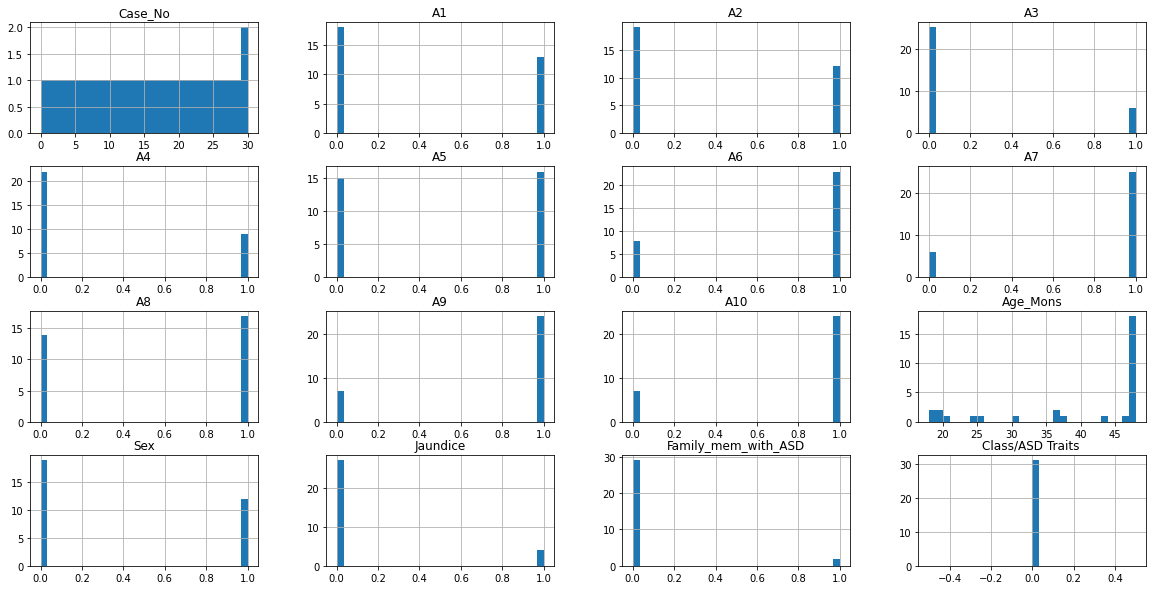

In [ ]:
new_data.hist(bins=30, figsize=(20, 10))

In [ ]:
from google.colab import files

new_data.to_csv('gamma.csv')
files.download('gamma.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###distributions for indvidual (beta)

In [ ]:
model = CopulaGAN(
     primary_key='Case_No',
     field_distributions={
         'Class/ASD Traits ': 'beta'
     },
     enforce_min_max_values=False
)

model.fit(data)


/usr/local/lib/python3.7/dist-packages/ctgan/data_transformer.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].to_numpy().flatten()
/usr/local/lib/python3.7/dist-packages/ctgan/data_transformer.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].to_numpy().flatten()
/usr/local/lib/python3.7/dist-packages/ctgan/data_transformer.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [ ]:
model.get_distributions()['Class/ASD Traits .value']
'copulas.univariate.beta.BetaUnivariate'

'copulas.univariate.beta.BetaUnivariate'

In [ ]:
new_data = model.sample(len(data))


In [ ]:

new_data.Age_Mons.value_counts()

48.0    13
47.9     2
35.8     1
25.2     1
38.6     1
46.3     1
37.6     1
42.4     1
18.7     1
43.8     1
22.8     1
30.2     1
36.2     1
38.1     1
37.9     1
47.5     1
31.7     1
45.1     1
Name: Age_Mons, dtype: int64

array([[<AxesSubplot:title={'center':'Case_No'}>,
        <AxesSubplot:title={'center':'A1'}>,
        <AxesSubplot:title={'center':'A2'}>,
        <AxesSubplot:title={'center':'A3'}>],
       [<AxesSubplot:title={'center':'A4'}>,
        <AxesSubplot:title={'center':'A5'}>,
        <AxesSubplot:title={'center':'A6'}>,
        <AxesSubplot:title={'center':'A7'}>],
       [<AxesSubplot:title={'center':'A8'}>,
        <AxesSubplot:title={'center':'A9'}>,
        <AxesSubplot:title={'center':'A10'}>,
        <AxesSubplot:title={'center':'Age_Mons'}>],
       [<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Jaundice'}>,
        <AxesSubplot:title={'center':'Family_mem_with_ASD'}>,
        <AxesSubplot:title={'center':'Class/ASD Traits '}>]], dtype=object)

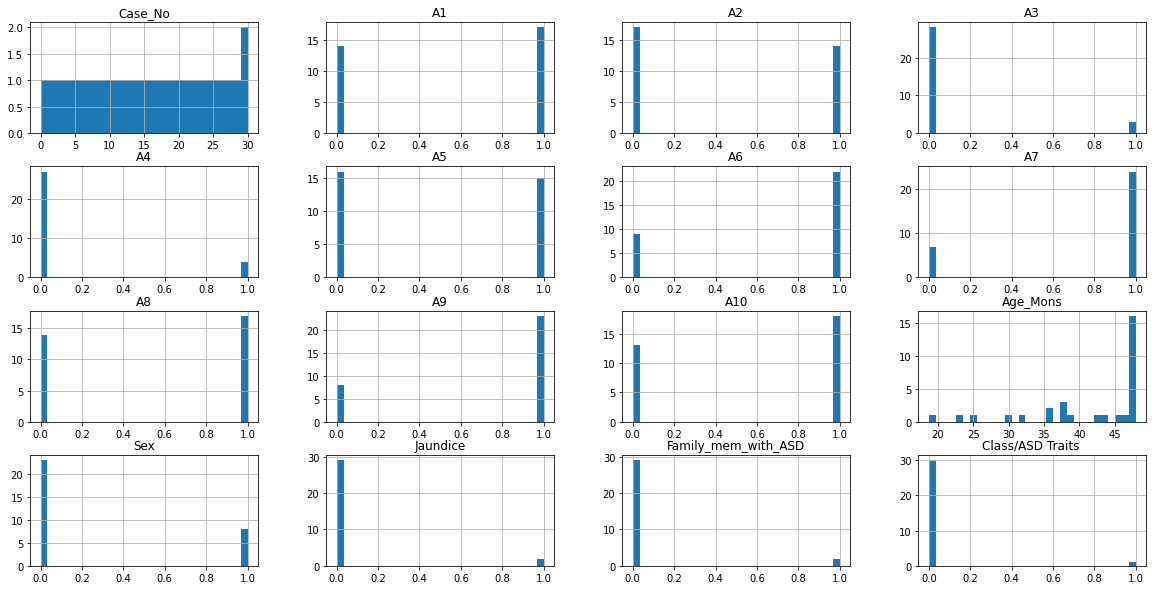

In [ ]:
new_data.hist(bins=30, figsize=(20, 10))

In [ ]:
from google.colab import files

new_data.to_csv('beta.csv')
files.download('beta.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>